# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests, json
import time
from scipy.stats import linregress

# Import API key
#from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [54]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

669

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [55]:
raw_data = pd.DataFrame(columns =("City","Latitude","Max Temp","Wind Speed","Cloudiness","Description", "Humidity"))

In [56]:
# Enter your API key here
api_key = "b9eda530467618ee7b488b14c39de25c"
  
# base_url variable to store url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#loop
for city_name in cities:
  
    # complete_url variable to store
    # complete url address
    complete_url = base_url + "appid=" + api_key + "&q=" + city_name
  
    # get method of requests module
    # return response object
    response = requests.get(complete_url)
  
    # json method of response object 
    # convert json format data into
    # python format data
    x = response.json()
  
    # Now x contains list of nested dictionaries
    # Check the value of "cod" key is equal to
    # "404", means city is found otherwise,
    # city is not found
    if x["cod"] != "404":
  
        # store the value of "main"
        # key in variable y
        y = x["main"]
        y1 = x["wind"]
        y2 = x["clouds"]
        y3 = x["coord"]
  
        # store the value corresponding
        # to the "temp" key of y
        current_temperature = y["temp_max"]
  
        # store the value corresponding
        # to the "clouds" key of y
        current_clouds = y2["all"]
      
        # store the value corresponding
        # to the "humidity" key of y
        current_humidity = y["humidity"]
    
         # store the value corresponding
        # to the "wind" key of y
        current_wind = y1["speed"]
  
        # store the value of "weather"
        # key in variable z
        z = x["weather"]
        
        lat = y3["lat"]
  
        # store the value corresponding 
        # to the "description" key at 
        # the 0th index of z
        weather_description = z[0]["description"]
  
        # print following values
        print(current_temperature, current_clouds, current_humidity, current_wind, weather_description, city_name, lat) 
        row_to_add = {'City':city_name,'Latitude':lat,'Max Temp':current_temperature,'Cloudiness':current_clouds,'Wind Speed':current_wind,'Description':weather_description,'Humidity':current_humidity}
        raw_data = raw_data.append(row_to_add, ignore_index = True)
   
        
    else:
        print(" City Not Found ")

 City Not Found 
276.48 71 87 1.29 broken clouds new norfolk -42.7826
296.15 99 46 3.73 overcast clouds nurota 40.5614
293.58 0 64 5.89 clear sky port alfred -33.5906
295.93 75 68 6.17 broken clouds hamilton 39.1834
267.93 88 83 5.92 overcast clouds khatanga 71.9667
276.15 75 81 12.86 broken clouds ushuaia -54.8
278.15 0 48 3 clear sky tugulym 57.0591
296.15 75 83 3.6 broken clouds vaini -21.2
267.45 7 94 3.23 clear sky krasnoselkup 65.7
299.38 93 82 7.04 overcast clouds rikitea -23.1203
274.15 0 64 4.12 clear sky tasiilaq 65.6145
271.82 33 79 0.97 scattered clouds qaanaaq 77.484
288.71 36 79 1.34 scattered clouds busselton -33.65
299.86 100 82 1.6 overcast clouds kalmunai 7.4167
303.15 20 54 8.23 few clouds puerto ayora -0.7393
308.82 5 28 4.78 clear sky porto murtinho -21.6989
286.48 100 73 3.13 overcast clouds mataura -46.1927
309.32 11 16 4.92 few clouds araouane 18.9048
291.15 0 59 4.12 clear sky valparaiso -33.0393
301.48 2 95 0.78 clear sky thoen 17.6129
291.48 100 47 2.37 light

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [57]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         612 non-null    object 
 1   Latitude     612 non-null    float64
 2   Max Temp     612 non-null    float64
 3   Wind Speed   612 non-null    float64
 4   Cloudiness   612 non-null    object 
 5   Description  612 non-null    object 
 6   Humidity     612 non-null    object 
dtypes: float64(3), object(4)
memory usage: 33.6+ KB


In [58]:
raw_data['Cloudiness'] = raw_data['Cloudiness'].astype(float)
raw_data['Humidity'] = raw_data['Humidity'].astype(float)
raw_data

,City,Latitude,Max Temp,Wind Speed,Cloudiness,Description,Humidity
0,new norfolk,-42.7826,276.48,1.29,71.0,broken clouds,87.0
1,nurota,40.5614,296.15,3.73,99.0,overcast clouds,46.0
2,port alfred,-33.5906,293.58,5.89,0.0,clear sky,64.0
3,hamilton,39.1834,295.93,6.17,75.0,broken clouds,68.0
4,khatanga,71.9667,267.93,5.92,88.0,overcast clouds,83.0
...,...,...,...,...,...,...,...
607,prince rupert,54.3161,283.15,3.09,75.0,light rain,81.0
608,zelenoborskiy,66.8450,273.71,2.78,47.0,scattered clouds,81.0
609,gazanjyk,39.2446,293.99,4.78,100.0,overcast clouds,53.0
610,yangjiang,21.8500,298.08,2.87,36.0,scattered clouds,83.0


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [59]:
clean_city_data = raw_data[raw_data['Humidity'] <= 100.0]
len(clean_city_data)

612

In [60]:
#  Get the indices of cities that have humidity over 100%.
#



In [61]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

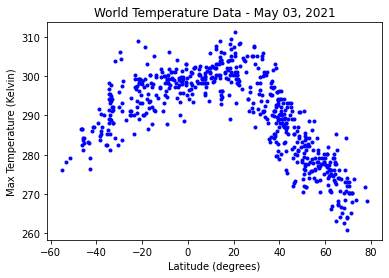

In [92]:
from datetime import date

today = date.today()
d2 = today.strftime("%B %d, %Y")

plt.plot(clean_city_data['Latitude'],clean_city_data['Max Temp'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Max Temperature (Kelvin)')
plt.title('World Temperature Data - %s' % d2)
plt.show()

## Latitude vs. Humidity Plot

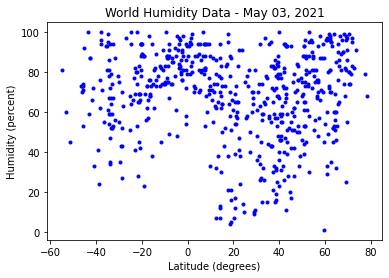

In [93]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Humidity'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Humidity (percent)')
plt.title('World Humidity Data - %s' % d2)
plt.show()

## Latitude vs. Cloudiness Plot

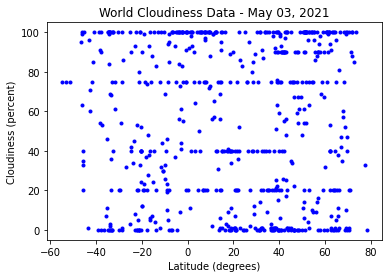

In [94]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Cloudiness'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloudiness (percent)')
plt.title('World Cloudiness Data - %s' % d2)
plt.show()

## Latitude vs. Wind Speed Plot

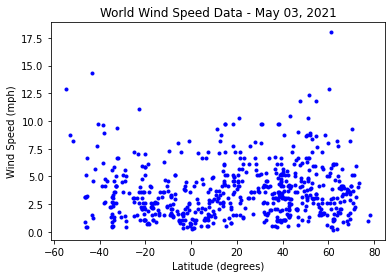

In [95]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Wind Speed'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (mph)')
plt.title('World Wind Speed Data - %s' % d2)
plt.show()

## Linear Regression

In [96]:
def linear_plot(x,y,xstring,ystring,thistitle):
    res = linregress(x, y)
    
    from datetime import date

    today = date.today()
    d2 = today.strftime("%B %d, %Y")

    plt.plot(x,y,'b.',label='Data')
    plt.plot(x, res.intercept + res.slope*x, 'r-', label='Linear Fit')
    plt.xlabel(xstring)
    plt.ylabel(ystring)
    plt.title(thistitle % d2)
    plt.legend()
    plt.show()

    from scipy.stats import t
    tinv = lambda p, dof: abs(t.ppf(p/2, dof))
    ts = tinv(0.05, len(x)-2)
    print(f"R-squared: {res.rvalue**2:.6f}")
    print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")

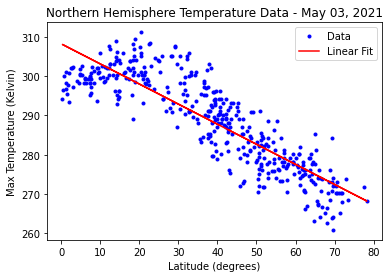

R-squared: 0.759701
slope (95%): -0.511593 +/- 0.027763


In [97]:
clean_city_north = clean_city_data[clean_city_data['Latitude']>0.0]

linear_plot(clean_city_north['Latitude'],clean_city_north['Max Temp'],'Latitude (degrees)','Max Temperature (Kelvin)','Northern Hemisphere Temperature Data - %s')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

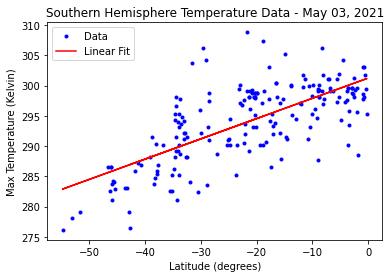

R-squared: 0.493837
slope (95%): 0.334825 +/- 0.048125


In [98]:
clean_city_south = clean_city_data[clean_city_data['Latitude']<0.0]

linear_plot(clean_city_south['Latitude'],clean_city_south['Max Temp'],'Latitude (degrees)','Max Temperature (Kelvin)','Southern Hemisphere Temperature Data - %s')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

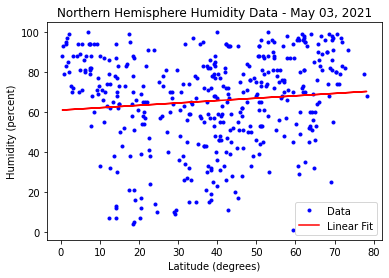

R-squared: 0.010361
slope (95%): 0.119369 +/- 0.112569


In [99]:
linear_plot(clean_city_north['Latitude'],clean_city_north['Humidity'],'Latitude (degrees)','Humidity (percent)','Northern Hemisphere Humidity Data - %s')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

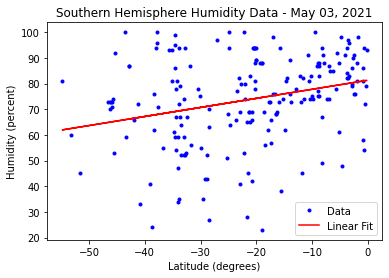

R-squared: 0.076712
slope (95%): 0.353108 +/- 0.173918


In [100]:
linear_plot(clean_city_south['Latitude'],clean_city_south['Humidity'],'Latitude (degrees)','Humidity (percent)','Southern Hemisphere Humidity Data - %s')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

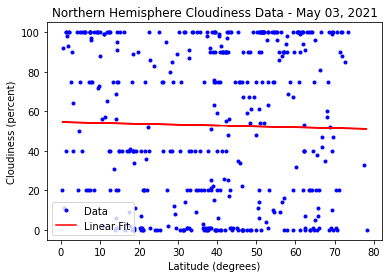

R-squared: 0.000476
slope (95%): -0.042878 +/- 0.189525


In [101]:
linear_plot(clean_city_north['Latitude'],clean_city_north['Cloudiness'],'Latitude (degrees)','Cloudiness (percent)','Northern Hemisphere Cloudiness Data - %s')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

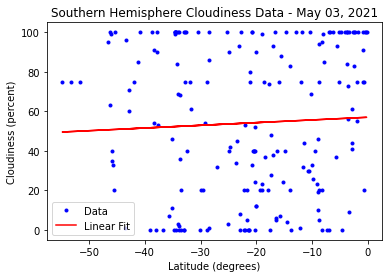

R-squared: 0.002401
slope (95%): 0.136115 +/- 0.393928


In [102]:
linear_plot(clean_city_south['Latitude'],clean_city_south['Cloudiness'],'Latitude (degrees)','Cloudiness (percent)','Southern Hemisphere Cloudiness Data - %s')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

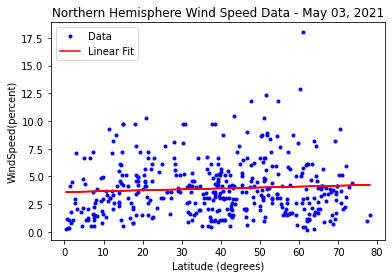

R-squared: 0.004354
slope (95%): 0.008278 +/- 0.012080


In [103]:
linear_plot(clean_city_north['Latitude'],clean_city_north['Wind Speed'],'Latitude (degrees)','WindSpeed(percent)','Northern Hemisphere Wind Speed Data - %s')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

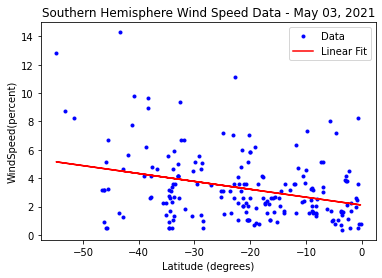

R-squared: 0.100708
slope (95%): -0.055626 +/- 0.023599


In [104]:
linear_plot(clean_city_south['Latitude'],clean_city_south['Wind Speed'],'Latitude (degrees)','WindSpeed(percent)','Southern Hemisphere Wind Speed Data - %s')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression